In [42]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import NaN
from pylab import rcParams

rcParams["figure.figsize"] = 16, 4

## Log file

**For a fair comparison between groups, must follow the output format below**
<br>$\color{red}{\text{{seq}|{timestamp\_tx}|{timestamp\_rx}|{payload in hex}|{rssi}}}$
<br> seq (decimal); timestamps (ticks with rtimer), payload (hex).
***
<br>*Example log file output for one packet with seq number "0x00", "0x01", "0x02"
<br>transmitter timestamp xxxx, reciever timestamp xxxx and random payload length 32)*
<br>0|66405|1781766|2f c2 39 44 d3 16 7d b8 b7 aa 01 6c db 7e c5 60 3f 92 c9 94 e3 e6 0d 08 c7 7a 91 bc eb 4e 55 b0 |-31
<br>1|128906|1844756|3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a1 8c 7b 9e 65 80 df b2 69 b4 83 06 ad 28 67 9a 31 |-29
<br>2|191408|1906287|49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a1 8c 7b 9e 65 80 df b2 |-30
<br>$\color{red}{\text{delimiter for four variables is "|" and delimiter for the payload each byte is the space " ".}}$

In [43]:
def readfile(filename):
    types = {
        "seq": int,
        "time_tx": float,
        "time_rx": float,
        "payload": str,
        "rssi": int,
    }
    df = pd.read_csv(
        StringIO(" ".join(l for l in open(filename))),
        skiprows=0,
        header=None,
        dtype=types,
        delim_whitespace=False,
        delimiter="|",
    )
    df.columns = ["seq", "time_tx", "time_rx", "payload", "rssi"]
    df.dropna(inplace=True)
    # print(df.describe())
    return df

In [44]:
# define the file name
filename = "udp_m"
# import file to jupyter notebook
df = readfile("./" + filename + ".csv")

# check the imported data first 10 lines
df.head(10)

,seq,time_tx,time_rx,payload,rssi
0,1,17740811,2322135,3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a...,-98
1,2,17803800,2383659,49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e...,-94
2,3,17866788,2449089,56 bd f8 f7 ea 41 ac 1b be 05 a0 7f d2 09 d4 2...,-97
3,4,17929777,2512078,63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 6...,-98
4,5,17992766,2572425,70 0f 22 19 a4 b3 76 5d 18 97 0a e1 cc bb de a...,-95
5,6,18055755,2639520,7d b8 b7 aa 01 6c db 7e c5 60 3f 92 c9 94 e3 e...,-97
6,7,18118743,2701044,8a 61 4c 3b 5e 25 40 9f 72 29 74 43 c6 6d e8 2...,-97
7,8,18181732,2763057,97 0a e1 cc bb de a5 c0 1f f2 a9 f4 c3 46 ed 6...,-96
8,9,18244721,2825557,a4 b3 76 5d 18 97 0a e1 cc bb de a5 c0 1f f2 a...,-97
9,10,18307710,2890011,b1 5c 0b ee 75 50 6f 02 79 84 13 56 bd f8 f7 e...,-96


# Delay

## Definition

**Evaluation metric**
<br>*File delay: the total latency that certain amount of Data $F$ is delivered to the destination.*
<br> $File\ Delay = Rx\_timestamp[N] - Rx\_timestamp[0]$
<br> where $N$ is the last packet
***
**Interesting to look at**:
<br>*Timestamp difference*: $\Delta T[i] = Rx\_timestamp[i] - Tx\_timestamp[i]$
1. *Worst-case packet delay*: the delay of the packet that takes the longest time to traverse.
2. *Packet delay variation*: the std of the packet delay.

In [45]:
# compute the file delay
file_delay = df.time_rx[len(df) - 1] - df.time_rx[0]
print(f"The time it takes to transfer the file is : {file_delay} (ticks with rtimer).")

The time it takes to transfer the file is : 15998180 (ticks with rtimer).


## Statistics

In [46]:
# compute the Delta_t metric
df["delta_t"] = df["time_rx"] - df["time_tx"]
# check the updated dataframe first 10 lines
df.head(10)

,seq,time_tx,time_rx,payload,rssi,delta_t
0,1,17740811,2322135,3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a...,-98,-15418676
1,2,17803800,2383659,49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e...,-94,-15420141
2,3,17866788,2449089,56 bd f8 f7 ea 41 ac 1b be 05 a0 7f d2 09 d4 2...,-97,-15417699
3,4,17929777,2512078,63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 6...,-98,-15417699
4,5,17992766,2572425,70 0f 22 19 a4 b3 76 5d 18 97 0a e1 cc bb de a...,-95,-15420341
5,6,18055755,2639520,7d b8 b7 aa 01 6c db 7e c5 60 3f 92 c9 94 e3 e...,-97,-15416235
6,7,18118743,2701044,8a 61 4c 3b 5e 25 40 9f 72 29 74 43 c6 6d e8 2...,-97,-15417699
7,8,18181732,2763057,97 0a e1 cc bb de a5 c0 1f f2 a9 f4 c3 46 ed 6...,-96,-15418675
8,9,18244721,2825557,a4 b3 76 5d 18 97 0a e1 cc bb de a5 c0 1f f2 a...,-97,-15419164
9,10,18307710,2890011,b1 5c 0b ee 75 50 6f 02 79 84 13 56 bd f8 f7 e...,-96,-15417699


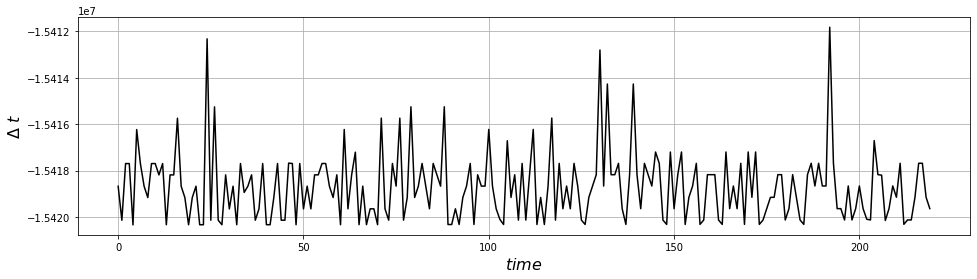

In [47]:
# visual delta_t along with the timeline
plt.plot(df["delta_t"], color="black")

plt.xlabel("$time$", fontsize=16)
plt.ylabel("$\Delta\ t$", fontsize=16)
plt.grid()

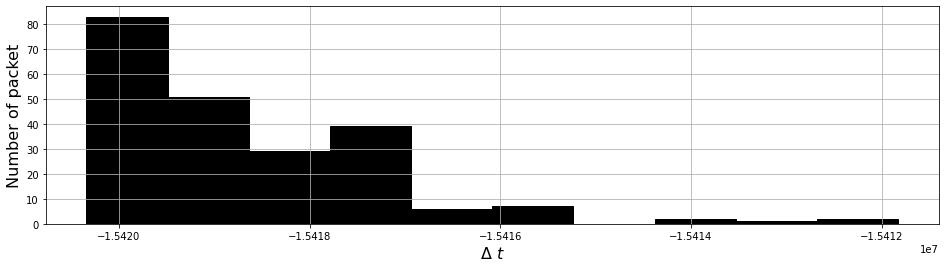

In [48]:
# visual delta_t distribution with histogram
plt.hist(df["delta_t"], color="black", edgecolor="black", bins=10)

plt.xlabel("$\Delta\ t$", fontsize=16)
plt.ylabel("Number of packet", fontsize=16)
plt.grid()

In [49]:
# Worst-case delay
wc_t = max(df["delta_t"])

# Delay std
std_t = df.delta_t.std()

print(f"worse-case delta_t t$: {wc_t} \ndelta_t variation: {std_t} ")

worse-case delta_t t$: -15411828 
delta_t variation: 1485.3252927630735 


# Reliability

## Definition

**Evaluation metric**
<br>*Quality of data transfer.*
<br> *File correctness*: the ratio of file correctly delivered to the data sink.
***
**Interesting to look at**:
1. *Expected number of transmission*: the ratio of the number of packets correctly received by the data sink and the number of packets sent by the source.

$$ETX = \frac{Number\ of\ packet\ received}{Number\ of\ packet\ sent}$$

2. *Packet reliability*: the number of packet bit correctly delivered to next hop.
$$Bit\ reliability[i] = 1 - BER[i] = 1 - \frac{Number\ of\ wrong\ bit}{Total\ Number\ of\ bit\ sent}$$

## Statistics

In [50]:
def parse_payload(payload_string):
    tmp = map(lambda x: int(x, base=16), payload_string.split())
    return list(tmp)


def compute_sequence(seed, length):
    A1 = 1664525
    C1 = 1013904223
    RAND_MAX1 = (1 << 31) - 1  #
    MAX_BYTE = (1 << 8) - 1  # one byte
    num = seed | (1 << 4)  # seed (4 bites) is part of the seq number
    seq = list()
    for _ in range(length):  # generate the random payload byte by byte
        num = (num * A1 + C1) & RAND_MAX1
        seq.append(num & MAX_BYTE)
    return seq


def popcount(n):
    return bin(n).count("1")


def compute_bit_errors(payload, sequence):
    return sum(
        map(
            popcount,
            (
                np.array(payload[:PACKET_LEN])
                ^ np.array(sequence[: len(payload[:PACKET_LEN])])
            ),
        )
    )


def compute_ber(df, PACKET_LEN):
    packets = len(df)
    
    # dataframe records the bit error for each packet
    error = pd.DataFrame(columns=['seq', 'bit_errors'])
    # seq number initialization
    error.seq = range(df.seq[0], df.seq[packets-1]+1)
    # bit_errors list initialization
    error.bit_errors = [list() for x in range(len(error))]
    
    file_size = len(error) * PACKET_LEN * 8
    
    # start count the error bits
    for idx in range(packets):
        # return the matched row index for the specific seq number in log file
        error_idx = error.index[error.seq == df.seq[idx]][0]
        # compute the bit errors
        payload = parse_payload(df.payload[idx])
        sequence = compute_sequence(df.seq[idx], PACKET_LEN)
        error.bit_errors[error_idx].append(compute_bit_errors(payload, sequence))

    # total bit error counter initialization
    counter = 0
    # for the lost packet 
    for l in error.bit_errors:
        if l == []: 
            counter += PACKET_LEN*8 # when the seq number is lost, consider the entire packet payload as error
        else:
            counter += min(l) # when the seq number received several times, consider the minimum error
    print(error)
    return counter / file_size

In [51]:
# payload example for debug purpose
# correct sequence for seq NO. 'ae'
PACKET_LEN = 32  # packet payload length defined by the transmitter
tmp = compute_sequence(int("02", base=16), PACKET_LEN)
for i in tmp:
    print("{:02x}".format(i), end=" ")

49 14 63 66 8d 88 47 fa 11 3c 6b ce d5 30 cf e2 d9 64 73 36 1d d8 57 ca a1 8c 7b 9e 65 80 df b2 

In [52]:
PACKET_LEN = 32  # packet payload length defined by the transmitter

# compute the BER for all received packets
ber = compute_ber(df, PACKET_LEN=PACKET_LEN)
print(f"Bit reliability: {1-ber}")

     seq bit_errors
0      1        [0]
1      2        [0]
2      3        [0]
3      4        [0]
4      5        [0]
..   ...        ...
250  251         []
251  252        [0]
252  253         []
253  254        [0]
254  255        [0]

[255 rows x 2 columns]
Bit reliability: 0.8627450980392157


# Energy consumption

## Definition

**The total number of energy for the file transmitted and receiving during the file transmission.**
<br> system energy consumption = Transmission energy consumption + Relay energy consumption
1. Transmission energy consumption: measure transmitter with power profiler kit (PPK2)
2. Relay energy consumption: measure relay node with PPK2
***
<a href="https://infocenter.nordicsemi.com/index.jsp?topic=%2Fug_nrf52840_dk%2FUG%2Fdk%2Fintro.html">Power measurement guidelines</a>

In [53]:
# load ppk data for the transmitter
energy_tx = pd.read_csv("./ppk-udp.csv")

# check the imported data first 10 lines
energy_tx.head(10)

,Timestamp(ms),Current(uA),D0-D7
0,67775.68,14103.027,0
1,67775.69,13866.643,0
2,67775.70,13866.643,0
3,67775.71,14339.720,0
4,67775.72,14292.356,0
5,67775.73,14197.667,0
6,67775.74,13961.159,0
7,67775.75,14055.726,0
8,67775.76,14055.726,0
9,67775.77,14197.667,0


In [54]:
# the voltage (controlled by the PPK2, in the example log we set it as 4000 mV)
voltage = 4000 / 1e3  # mV to V

# the power consumption
average_current = energy_tx.iloc[:, 1].mean() / 1e6  # mA to A
time = (energy_tx.iloc[-1, 0] - energy_tx.iloc[0, 0]) / 1e3  # ms to S
charge = average_current * time  # unit is C
power = average_current * voltage

print(
    f"The total charge (current*time) [mC]: {charge*1e3} \nThe total energy consumption is [mW]: {power*1e3}"
)

The total charge (current*time) [mC]: 99.20233866162212 
The total energy consumption is [mW]: 56.68713164540066


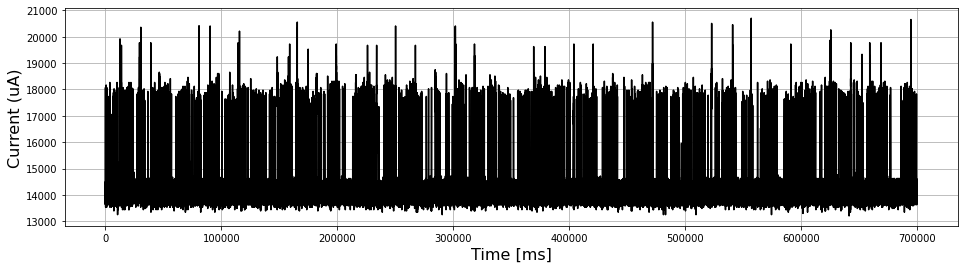

In [55]:
# the current log for three transmissions
plt.plot(energy_tx.iloc[:, 1], color="black")

plt.xlabel("Time [ms]", fontsize=16)
plt.ylabel("Current (uA)", fontsize=16)
plt.grid()